In [1]:
import pandas as pd
#import urllib3
#import io
#import pyexcel
#import openpyxl
from openpyxl import load_workbook
#try:
#    from urllib.request import Request, urlopen # Python 3
#except ImportError:
#    from urllib2 import Request, urlopen # Python 2

# import the os module
import os, errno
import numpy as np
import numpy.ma as ma

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# detect the current working directory (wd) and print it
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators


In [3]:
os.chdir('/Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators')



In [4]:
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators


In [5]:
# make a subfolder for downloaded data source for dataframe
# define the name of the directory to be created, then make it
path = "data"

try:
    os.mkdir(path)
except OSError as e:
#    print ("Creation of the directory %s failed" % path)
#else:
#    print ("Successfully created the directory %s " % path)
    if e.errno != errno.EEXIST:
        raise

In [6]:
# Do not need to move to new data subfolder
os.chdir('/Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators')
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators


In [7]:
# confirm that you have the data file in this directory
os.path.isfile('./data/VS18_Indicators_2010-2018.xlsx')    # True if file exists
# If True progress to # Use pandas to read data from Excel file downloaded (below)

True

In [8]:
# Following chunks commented out returned errors as attempts to read data from URL

In [9]:
# Use pandas to read file from URL
# Still encountering error UnsupportedOperation: seek error # N.B. xlrd.Book has a read attribute too'
#req = Request('https://bniajfi.org/wp-content/uploads/2020/04/VS18_Indicators_2010-2018.xlsx')
#req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
#content = urlopen(req)

# Add a test in excel.ExcelFile init method to resolve UnsupportedOperation: Seek error '# N.B. xlrd.Book has a read attribute too'
#df = pd.read_excel(content, sheet_name=0, index_col=0)

#if engine == 'xlrd' and isinstance(io, xlrd.Book):
 #   self.book = io
#elif not isinstance(io, xlrd.Book) and hasattr(io, "read"):
    # N.B. xlrd.Book has a read attribute too
 #   data = io.read()
  #  self.book = xlrd.open_workbook(file_contents=data)
#elif not isinstance(io, xlrd.Book) and not hasattr(io, "read"):
    # N.B. xlrd.Book has no read attribute
 #   self.book = xlrd.open_workbook(file_contents=io)
#elif isinstance(io, compat.string_types):
 #   self.book = xlrd.open_workbook(io)
#else:
 #   raise ValueError('Must explicitly set engine if not passing in'
  #                           ' buffer or path for io.')

In [10]:
# Open a required pool manager to use urllib3 HTTPResponse
#http = urllib3.PoolManager()

In [11]:
# get HTTPResponse from URL location of Excel file
#r = http.request('GET', 'https://bniajfi.org/wp-content/uploads/2020/04/VS18_Indicators_2010-2018.xlsx', preload_content=False)
# keep response open (closes by default)
#r.auto_close = False

In [12]:
# View status from response
#r.status

In [13]:
# View headers from response
#r.headers

In [14]:
# View data from response
#r.data

In [15]:
# Try using openpyxl to read response content in memory
#sheet_ranges =r['Vital Signs Indicators']
#print(sheet_ranges['A1'].value)

In [16]:
# Try another format to load the indicator definitions directly from URL
# link = 'https://bniajfi.org/wp-content/uploads/2020/04/VS18_Indicators_2010-2018.xlsx'
# inddf = pd.read_excel(link, sheet_name=0, index_col=0)

In [17]:
# Use pandas to read data from Excel file downloaded
# to working directory subfolder created above, e.g. in git repo folder
# Download manually from URL data source, pending troubleshooting errors reading from URL directly (see commented code below)
# Data source URL: https://bniajfi.org/wp-content/uploads/2020/04/VS18_Indicators_2010-2018.xlsx

# Load explicitly entire workbook to memory only once 
data = pd.ExcelFile('./data/VS18_Indicators_2010-2018.xlsx', None)

# Get a list of sheet names after importing the workbook
allsheets = data.sheet_names
allsheets


['Vital Signs Indicators',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [18]:
dfind = pd.read_excel(data, 'Vital Signs Indicators')

In [19]:
# Get column names and counts for each in df for 'Vital Signs Indicators'
dfind.count()

Indicator               177
Section                 177
Source                  174
Normalization Source     36
Definition              177
dtype: int64

In [20]:
dfind.head(3)

,Indicator,Section,Source,Normalization Source,Definition
0,Total Population,Census Demographics,U.S. Census Bureau,NaN,The total number of persons of all ages that l...
1,Total Male Population,Census Demographics,U.S. Census Bureau,NaN,The total number of men of all ages of all age...
2,Total Female Population,Census Demographics,U.S. Census Bureau,NaN,The total number of women of all ages that liv...


In [21]:
# Check how Infant Mortality column was spelled in Indicators data catalogue worksheet,
# i.e. (with or without '... Rate') because later in script we uncover duplication with these spellings
if dfind['Indicator'].str.contains('Infant Mortality Rate').any() : 
  print('Infant Mortality Rate record is present') 
     
else: 
  print('Infant Mortality Rate record is not present')


Infant Mortality Rate record is not present


In [22]:
# Check how Infant Mortality column was spelled in Indicators data catalogue worksheet,
# i.e. (with or without '... Rate') because later in script we uncover duplication with these spellings
if dfind['Indicator'].str.contains('Infant Mortality').any() : 
  print('Infant Mortality record is present') 
     
else: 
  print('Infant Mortality record is not present')


Infant Mortality record is present


In [23]:
# Rename it to "Infant Mortality Rate" 
# because that's what we've found it's called throughout rest of data file 
# i.e. match it up with dataframe we'll link with later in script for all Year sheets and their resulting dataframe
dfind.loc[(dfind['Indicator']=='Infant Mortality')] = [['Infant Mortality Rate']]

In [24]:
# Now check our preferred column name again 
if dfind['Indicator'].str.contains('Infant Mortality Rate').any() : 
  print('Infant Mortality Rate record is present') 
     
else: 
  print('Infant Mortality Rate record is not present')

# note .str.contains('Infant Mortality') would still return True even though that exact value was replaced
# because it's contained within '... Rate'

Infant Mortality Rate record is present


In [25]:
dfind.head(3)

,Indicator,Section,Source,Normalization Source,Definition
0,Total Population,Census Demographics,U.S. Census Bureau,NaN,The total number of persons of all ages that l...
1,Total Male Population,Census Demographics,U.S. Census Bureau,NaN,The total number of men of all ages of all age...
2,Total Female Population,Census Demographics,U.S. Census Bureau,NaN,The total number of women of all ages that liv...


In [26]:
# Quick dataframe stats test for 2010 as example of year data
df2010 = pd.read_excel(data, '2010') # 1 index as alternate for sheet reference
df2010.describe()

,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,...,Percent of Population (Over the age of 18) Who are Registered to Vote,Percent Population (Over the age of 18) Who Voted in the General Election,"Rate of Dirty Streets and Alleys Reports per 1,000 Residents","Rate of Clogged Storm Drain Reports per 1,000 Residents",Percent of Employed Population with Travel Time to Work of 0-14 Minutes,Percent of Employed Population with Travel Time to Work of 15-29 Minutes,Percent of Employed Population with Travel Time to Work of 30-44 Minutes,Percent of Employed Population with Travel Time to Work of 45 Minutes and Over,Percent of Homes Weatherized,Number of Total Jobs Filled by Employees
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,22083.660714,10346.767857,11736.892857,61.828068,29.008320,2.379725,1.694368,0.506515,4.597935,36.745713,...,76.101702,43.437500,76.299337,5.157162,19.025076,38.067486,23.199881,19.707557,0.800893,11372.946429
std,81595.618559,38407.967805,43189.394801,33.013489,28.074165,3.174942,0.601199,0.244045,5.970991,22.118950,...,10.226398,7.744102,100.022976,3.395830,7.622125,5.029682,5.014932,5.592444,2.391768,43542.414601
min,4101.000000,1733.000000,2368.000000,2.669372,0.654240,0.075949,0.839980,0.187970,0.731740,7.326862,...,53.212155,30.100000,3.169959,0.731529,8.494405,22.215569,9.962101,8.392196,0.000000,161.000000
25%,7870.250000,3573.250000,4312.250000,34.078651,3.688793,0.461554,1.211178,0.357756,1.366829,17.775744,...,70.252553,37.700000,27.352870,2.695914,13.253621,35.443368,20.224551,15.222510,0.097500,1139.500000
50%,10181.500000,4682.500000,5599.500000,72.369478,16.973742,1.263990,1.556234,0.434007,2.359598,36.853063,...,77.755798,42.750000,42.846321,4.224942,17.238799,38.966854,24.211736,20.014663,0.305000,2851.000000
75%,14900.500000,6852.750000,7752.000000,91.242085,48.142793,2.757697,1.961301,0.599642,4.230293,55.805154,...,81.876082,48.425000,85.720198,6.208472,23.214980,40.692267,27.169360,23.401978,0.522500,6426.500000
max,620961.000000,292249.000000,328712.000000,96.696203,90.305963,15.947875,4.051113,1.517572,30.347169,77.765958,...,96.496398,64.700000,611.875080,14.791337,41.306584,49.160801,33.888624,31.341953,15.690000,320010.000000


In [27]:
# delete test dataframe if no longer needed
# We will keep it when we are reading from Excel worksheets, since we'll have to read each to a df, below
#del df2010

In [28]:
# Now modify the list of sheet names to extract indicator definitions sheet
# Referece dfind dataframe for that information instead
allsheets.pop(0)

'Vital Signs Indicators'

In [29]:
# Name and display result to confirm only yearly data sheets remain
years = allsheets
years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [30]:
# Make dataframes for each sheet's data to merge/concat
# When we know that all columns do not match between sheets, do not use concat straight on the file read command without testing first (you may lost unmatched columns)
df2011 = pd.read_excel(data, '2011')
df2012 = pd.read_excel(data, '2012')
df2013 = pd.read_excel(data, '2013')
df2014 = pd.read_excel(data, '2014')
df2015 = pd.read_excel(data, '2015')
df2016 = pd.read_excel(data, '2016')
df2017 = pd.read_excel(data, '2017')
df2018 = pd.read_excel(data, '2018')

In [31]:
# Because we found later that a mismatched column naming existed, find it to rename it in original dataframe
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2010.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [32]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2011.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [33]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2012.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [34]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2013.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [35]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2014.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [36]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2015.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [37]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2016.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [38]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2017.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [39]:
# Find the year where Infant Mortality column was spelled without '... Rate'
if 'Infant Mortality' in df2018.columns : 
  print('Infant Mortality column is present') 
     
else: 
  print('Infant Mortality column is not present')

Infant Mortality column is not present


In [40]:
# All years return no instance of a column 'Infant Mortality', so let's try search another way; 
# after concatenating years (below) we'll find it by dropping records with NaN using dropna()

In [41]:
# Add the year as a column in each df
# Copy this for all years
Year = '2010'
df2010['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2010['YearID'] = (df2010['Year'].astype(str) + '-' + df2010['ID'].astype(str))
df2010.head(3)

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,"Rate of Dirty Streets and Alleys Reports per 1,000 Residents","Rate of Clogged Storm Drain Reports per 1,000 Residents",Percent of Employed Population with Travel Time to Work of 0-14 Minutes,Percent of Employed Population with Travel Time to Work of 15-29 Minutes,Percent of Employed Population with Travel Time to Work of 30-44 Minutes,Percent of Employed Population with Travel Time to Work of 45 Minutes and Over,Percent of Homes Weatherized,Number of Total Jobs Filled by Employees,Year,YearID
0,1,Allendale/Irvington/S. Hilton,16217,7246,8971,88.166739,8.324598,0.456311,1.307270,0.456311,...,41.684652,4.193131,12.906310,40.232632,27.390057,19.471001,0.48,1887,2010,2010-1
1,2,Beechfield/Ten Hills/West Hills,12264,5566,6698,78.864971,16.780822,0.839856,1.541096,0.383235,...,10.518591,3.424658,13.535571,43.517093,27.194333,15.753003,0.51,870,2010,2010-2
2,3,Belair-Edison,17416,7891,9525,86.891364,9.933395,0.528250,1.148369,0.275609,...,90.204410,4.076711,9.135698,41.075450,28.575450,21.213401,0.59,988,2010,2010-3


In [42]:
# Add the year as a column in each df
# Copy this for all years
Year = '2011'
df2011['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2011['YearID'] = (df2011['Year'].astype(str) + '-' + df2011['ID'].astype(str))
df2011.head(2)

,ID,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,Walk Score,"Percent of Population Using Other Means to Commute to Work (Taxi, Motorcycle, Bicycle, Other)",Number of Students Officially Enrolled in 1st - 5th Grade,Number of Students Officially Enrolled in 6th - 8th Grade,Number of Students Officially Enrolled in 9th - 12th Grade,"Rate of Businesses in the Creative Economy per 1,000 residents",Number of Employees in the Creative Economy,Number of Total Jobs,Year,YearID
0,1,Allendale/Irvington/S. Hilton,33504.324121,39.285349,16.545226,16.759114,7.862864,19.547447,18.490858,34.163347,...,43.971774,1.210898,965,582,852,0.061664,1,2250,2011,2011-1
1,2,Beechfield/Ten Hills/West Hills,50439.739513,21.716875,19.190961,23.449173,12.296977,23.346014,11.514523,16.741238,...,32.532967,0.366483,597,317,463,0.407697,14,1004,2011,2011-2


In [43]:
Year = '2012'
df2012['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2012['YearID'] = (df2012['Year'].astype(str) + '-' + df2012['ID'].astype(str))
df2012.head(2)

,ID,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,"Percent of Population Using Other Means to Commute to Work (Taxi, Motorcycle, Bicycle, Other)",Number of Students Officially Enrolled in 1st - 5th Grade,Number of Students Officially Enrolled in 6th - 8th Grade,Number of Students Officially Enrolled in 9th - 12th Grade,Average Healthy Food Availability Index,"Rate of Businesses in the Creative Economy per 1,000 residents",Number of Employees in the Creative Economy,Number of Total Jobs,Year,YearID
0,1,Allendale/Irvington/S. Hilton,33177.658915,37.758920,19.024686,14.472567,10.461679,18.282149,19.752066,35.935433,...,1.673932,973,568,833,7.750000,0.123327,7,2338,2012,2012-1
1,2,Beechfield/Ten Hills/West Hills,50135.121622,18.714042,19.202777,23.973497,10.596696,27.512988,8.287293,15.054835,...,0.675676,583,364,474,15.583333,0.326158,10,1045,2012,2012-2


In [44]:
# 2013 has an unnamed column where 'ID' should appear
df2013.head()

,Unnamed: 0,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,Percent of Homes Weatherized,"Percent of Population Using Other Means to Commute to Work (Taxi, Motorcycle, Bicycle, Other)",Number of Students Officially Enrolled in 1st - 5th Grade,Number of Students Officially Enrolled in 6th - 8th Grade,Number of Students Officially Enrolled in 9th - 12th Grade,Number of Trees of Planted,Percent Subsidized Housing,"Rate of Businesses in the Creative Economy per 1,000 residents",Number of Employees in the Creative Economy,Number of Total Jobs
0,1,Allendale/Irvington/S. Hilton,38129.073308,32.362829,19.121571,16.335742,14.039422,18.140435,17.667654,34.955287,...,0.359195,1.473266,920,572,807,349.0,NaN,0.123327,3,2448
1,2,Beechfield/Ten Hills/West Hills,49807.861765,20.538150,18.962729,22.525667,10.453113,27.520341,10.690025,19.183538,...,0.333426,0.558140,580,365,490,123.0,NaN,0.326158,10,1041
2,3,Belair-Edison,43903.901338,28.448113,17.797911,19.057309,11.183172,23.513496,16.238411,30.335057,...,0.635425,1.133305,1114,701,1080,222.0,NaN,0.574185,69,2948
3,4,Brooklyn/Curtis Bay/Hawkins Point,34419.965251,35.957824,20.126921,17.378010,12.256127,14.281117,28.738910,46.741919,...,0.352444,3.572100,972,480,482,163.0,NaN,0.772309,32,8617
4,5,Canton,90862.712924,9.291095,7.785941,13.015386,11.972423,57.935155,3.068450,7.928389,...,0.000000,3.712687,79,35,28,91.0,NaN,2.469140,136,3330


In [45]:
df2013.columns

Index(['Unnamed: 0', 'CSA2010', 'Median Household Income',
       'Percent of Households Earning Less than $25,000',
       'Percent of Households Earning $25,000 to $40,000',
       'Percent of Households Earning $40,000 to $60,000',
       'Percent of Households Earning $60,000 to $75,000',
       'Percent of Households Earning More than $75,000',
       'Percent of Family Households Living Below the Poverty Line',
       'Percent of Children Living Below the Poverty Line',
       ...
       'Percent of Homes Weatherized',
       'Percent of Population Using Other Means to Commute to Work (Taxi, Motorcycle, Bicycle, Other)',
       'Number of Students Officially Enrolled in 1st - 5th Grade',
       'Number of Students Officially Enrolled in 6th - 8th Grade',
       'Number of Students Officially Enrolled in 9th - 12th Grade',
       'Number of Trees of Planted', 'Percent Subsidized Housing',
       'Rate of Businesses in the Creative Economy per 1,000 residents',
       'Number of Em

In [46]:
# Add column label to 2013 ID
df2013.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
# Display just the first column (index of column renamed ID)
df2013.columns[0]

'ID'

In [47]:
Year = '2013'
df2013['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2013['YearID'] = (df2013['Year'].astype(str) + '-' + df2013['ID'].astype(str))
df2013.head(2)

,ID,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,Number of Students Officially Enrolled in 1st - 5th Grade,Number of Students Officially Enrolled in 6th - 8th Grade,Number of Students Officially Enrolled in 9th - 12th Grade,Number of Trees of Planted,Percent Subsidized Housing,"Rate of Businesses in the Creative Economy per 1,000 residents",Number of Employees in the Creative Economy,Number of Total Jobs,Year,YearID
0,1,Allendale/Irvington/S. Hilton,38129.073308,32.362829,19.121571,16.335742,14.039422,18.140435,17.667654,34.955287,...,920,572,807,349.0,NaN,0.123327,3,2448,2013,2013-1
1,2,Beechfield/Ten Hills/West Hills,49807.861765,20.538150,18.962729,22.525667,10.453113,27.520341,10.690025,19.183538,...,580,365,490,123.0,NaN,0.326158,10,1041,2013,2013-2


In [48]:
Year = '2014'
df2014['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2014['YearID'] = (df2014['Year'].astype(str) + '-' + df2014['ID'].astype(str))
df2014.head(2)

,ID,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,Number of Students Officially Enrolled in 9th - 12th Grade,Number of Trees of Planted,"Rate of Housing Vouchers per 1,000 Rental Units","Rate of Businesses in the Creative Economy per 1,000 residents",Number of Employees in the Creative Economy,Number of Public Murals,Number of Total Jobs Filled by Employees,"Number of Adult Arrests per 1,000 Residents (Over the age of 18)",Year,YearID
0,1,Allendale/Irvington/S. Hilton,35958.253351,35.6125,19.4403,16.6248,12.4518,15.87,23.111782,41.549138,...,774,78.0,211.351755,0.061664,1,3,2394,34.454403,2014,2014-1
1,2,Beechfield/Ten Hills/West Hills,52622.688525,20.0738,17.5282,20.2682,12.9421,29.19,11.828712,22.309382,...,445,36.0,166.739606,0.244618,8,1,1142,16.454352,2014,2014-2


In [49]:
Year = '2015'
df2015['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2015['YearID'] = (df2015['Year'].astype(str) + '-' + df2015['ID'].astype(str))
df2015.head(2)

,ID,CSA2010,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earning $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning More than $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,...,Percentage of 3rd Grade Students who Met or Exceeded PARCC Math,Percentage of 3rd Grade Students who Met or Exceeded PARCC Reading,Percentage of 5th Grade Students who Met or Exceeded PARCC Math,Percentage of 5th Grade Students who Met or Exceeded PARCC Reading,Percentage of 8th Grade Students who Met or Exceeded PARCC Math,Percentage of 8th Grade Students who Met or Exceeded PARCC Reading,Percentage of Students who Met or Exceeded PARCC Algebra I,Percentage of Students who Met or Exceeded PARCC Algebra II,Year,YearID
0,1,Allendale/Irvington/S. Hilton,36701.906742,36.069693,18.847378,16.786731,12.732451,15.563746,24.147122,38.931487,...,10.365854,12.804878,4.878049,6.707317,4.968944,6.395349,2.777778,3.571429,2015,2015-1
1,2,Beechfield/Ten Hills/West Hills,51537.582075,20.384835,17.203277,20.956373,12.269004,29.186512,11.169652,19.416892,...,15.384615,27.350427,9.259259,15.740741,3.333333,20.720721,7.594937,3.773585,2015,2015-2


In [50]:
Year = '2016'
df2016['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2016['YearID'] = (df2016['Year'].astype(str) + '-' + df2016['ID'].astype(str))
df2016.head(2)

,ID,CSA2010,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,Percent of Population Under 5 years old,...,Percentage of 5th Grade Students who Met or Exceeded PARCC Math,Percentage of 5th Grade Students who Met or Exceeded PARCC Reading,Percentage of 8th Grade Students who Met or Exceeded PARCC Math,Percentage of 8th Grade Students who Met or Exceeded PARCC Reading,Percentage of Students who Met or Exceeded PARCC Algebra I,Percentage of Students who Met or Exceeded PARCC Algebra II,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Year,YearID
0,1,Allendale/Irvington/S. Hilton,87.409876,8.651924,0.242351,2.096334,0.000000,1.599515,23.915683,7.428052,...,11.602210,9.89011,4.945055,6.735751,4.790419,1.724138,44.910180,19.609052,2016,2016-1
1,2,Beechfield/Ten Hills/West Hills,78.662984,15.657531,0.431981,3.059273,0.566532,1.621698,36.792711,8.788329,...,9.708738,12.50000,12.000000,22.857143,13.265306,9.433962,48.091603,23.483366,2016,2016-2


In [51]:
Year = '2017'
df2017['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2017['YearID'] = (df2017['Year'].astype(str) + '-' + df2017['ID'].astype(str))
df2017.head(2)

,ID,CSA2010,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,Percent of Population Under 5 years old,...,Percentage of 3rd Grade Students who Met or Exceeded PARCC Reading,Percentage of 5th Grade Students who Met or Exceeded PARCC Math,Percentage of 5th Grade Students who Met or Exceeded PARCC Reading,Percentage of 8th Grade Students who Met or Exceeded PARCC Math,Percentage of 8th Grade Students who Met or Exceeded PARCC Reading,Percentage of Students who Met or Exceeded PARCC Algebra I,Percentage of Students who Met or Exceeded PARCC Algebra II,Kindergarten Readiness,Year,YearID
0,1,Allendale/Irvington/S. Hilton,90.284587,6.534736,0.113596,1.004424,0.000000,2.062657,20.115274,6.61246,...,7.511737,7.382550,6.153846,3.968254,6.153846,7.920792,1.694915,37.5,2017,2017-1
1,2,Beechfield/Ten Hills/West Hills,75.319244,18.855948,0.418191,3.308192,0.313643,1.784781,41.017612,7.93070,...,16.393443,16.949153,14.545455,6.451613,14.545455,7.526882,10.752688,40.0,2017,2017-2


In [52]:
Year = '2018'
df2018['Year'] = Year
# Make a unique ID for each ID within each year, because we plan to merge all these df into one
# This will help with validating our merged data frame later back to root rows from separate worksheets
df2018['YearID'] = (df2018['Year'].astype(str) + '-' + df2018['ID'].astype(str))
df2018.head(2)

,ID,CSA2010,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,Percent of Population Under 5 years old,...,"Number of daily bus stop loadings per 1,000 residents","Percent of Population Using Other Means to Commute to Work (Taxi, Motorcycle, Bicycle, Other)",Number of Trees of Planted,"Rate of Housing Vouchers per 1,000 Rental Units","Rate of Businesses in the Creative Economy per 1,000 Residents",Number of Employees in the Creative Economy,Number of Public Murals,"Rate of Street Light Outages per 1,000 Residents",Year,YearID
0,1,Allendale/Irvington/S. Hilton,88.713401,7.137650,0.085044,1.257441,0.103268,2.703195,23.987682,6.396550,...,435.138,1.60593,34,211.685824,0.000000,0,4,15.415922,2018,2018-1
1,2,Beechfield/Ten Hills/West Hills,76.672017,16.999159,0.512115,3.248490,0.412749,2.155469,40.298869,8.178552,...,225.762,0.76455,6,110.675039,0.244618,12,0,16.063275,2018,2018-2


In [53]:
# Check data types for matching columns that duplicated on first concatenation test
df2016['Percent of Population 5-17 years old'].dtypes

dtype('float64')

In [54]:
df2010['Percent of Population 5-17 Years old'].dtypes

dtype('float64')

In [55]:
df2017['Percent of Population 5-17 years old'].dtypes

dtype('float64')

In [56]:
df2018['Percent of Population 5-17 years old'].dtypes

dtype('float64')

In [57]:
df2010['Percent of Population 18-24 Years old'].dtypes

dtype('float64')

In [58]:
df2016['Percent of Population 18-24 years old'].dtypes

dtype('float64')

In [59]:
df2017['Percent of Population 18-24 years old'].dtypes

dtype('float64')

In [60]:
df2018['Percent of Population 18-24 years old'].dtypes

dtype('float64')

In [61]:
# Bridge all the years dataframes into an ordered list
years_df_list = [df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018]

In [62]:
# append all the years' data frames into one dataframe; name it
years_df = pd.concat(years_df_list, keys=["2010", "2011","2012","2013","2014","2015","2016","2017","2018"], ignore_index=True)

In [63]:
# Check out the results and note number of rows, columns
# Per Vital Signs Data Portal Intro, "Vital Signs now has more than 110 indicators!"
years_df

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Percent of Population 5-17 years old,Percent of Population 18-24 years old,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents"
0,1,Allendale/Irvington/S. Hilton,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Beechfield/Ten Hills/West Hills,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Belair-Edison,17416.0,7891.0,9525.0,86.891364,9.933395,0.528250,1.148369,0.275609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Brooklyn/Curtis Bay/Hawkins Point,14243.0,6981.0,7262.0,35.905357,47.805940,1.734185,4.051113,0.709120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Canton,8100.0,4011.0,4089.0,3.950617,86.012346,3.358025,1.320988,0.370370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,52,The Waverlies,NaN,NaN,NaN,73.464343,17.191942,1.038191,3.992090,0.111235,...,15.881844,7.699913,1.010369e+06,NaN,25.667484,23.998758,713.688000,NaN,NaN,2.321682
500,53,Upton/Druid Heights,NaN,NaN,NaN,90.769231,4.573235,1.401475,1.591149,0.600632,...,22.423604,10.168599,4.172566e+05,NaN,16.437826,35.378217,565.849000,NaN,NaN,28.911236
501,54,Washington Village/Pigtown,NaN,NaN,NaN,55.601660,31.618257,2.871369,4.315353,0.000000,...,13.925311,7.435685,1.657123e+06,NaN,25.804107,16.717325,625.141000,NaN,NaN,20.352535
502,55,Westport/Mount Winans/Lakeland,NaN,NaN,NaN,66.231725,20.012577,3.490017,0.361578,0.000000,...,23.879893,7.357334,3.146243e+06,NaN,19.525214,26.155187,300.690000,NaN,NaN,3.933137


In [64]:
# Find what year records with non NaN Infant Mortality values existed
# Commented out because this is returning a key error with any column name
#years_dfIM = df.dropna(subset=['Infant Mortality Rate'])

# Try finding its index number instead
col_name = "Infant Mortality Rate"
index_no = years_df.columns.get_loc(col_name)

# Print a statement with the index number of the column
print("Index of {} column in given dataframe is : {}".format(col_name, index_no))

Index of Infant Mortality Rate column in given dataframe is : 128


In [65]:
# Now use that index number to find what year records with non NaN Infant Mortality values existed

# "Infant Mortality" key error; commented out
#years_dfIM = years_df.dropna(subset=["Infant Mortality"])

# Try "Infant Mortality Rate" 
years_dfIM = years_df.dropna(subset=["Infant Mortality Rate"])
# print just a list/array of the years containing values; unique() shows each year only once
years_dfIM['Year'].unique()

# So we confirmed that "Infant Mortality" did not exist in years' worksheets, 
# but "... Rate" does consistently.

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype=object)

In [66]:
# Check data types again of duplicating columns from test
years_df['Percent of Population 18-24 years old'].dtypes

dtype('float64')

In [67]:
# Key Error: 'Percent of Population 5-17 years old2' occurs
# and column '...2' is not visible in dataframe at this point
#years_df['Percent of Population 18-24 years old2'].dtypes

In [68]:
for column in years_df.columns:
    print (column, years_df[column].dtypes)

ID object
CSA2010 object
Total Population float64
Total Male Population float64
Total Female Population float64
Percent of Residents - Black/African-American (Non-Hispanic) float64
Percent of Residents - White/Caucasian (Non-Hispanic) float64
Percent of Residents - Asian (Non-Hispanic) float64
Percent of Residents - Two or More Races (Non-Hispanic) float64
Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic) float64
Percent of Residents - Hispanic float64
Racial Diversity Index float64
Percent of Population Under 5 Years old float64
Percent of Population 5-17 Years old float64
Percent of Population 18-24 Years old float64
Percent of Population 25-64 Years old float64
Percent of Population 65 Years and over float64
Total Number of Households float64
Percent of Female-Headed Households with Children Under 18 float64
Percent of Households with Children Under 18 float64
Average Household Size float64
Median Household Income

In [69]:
years_df.columns

Index(['ID', 'CSA2010', 'Total Population', 'Total Male Population',
       'Total Female Population',
       'Percent of Residents - Black/African-American (Non-Hispanic)',
       'Percent of Residents - White/Caucasian (Non-Hispanic)',
       'Percent of Residents - Asian (Non-Hispanic)',
       'Percent of Residents - Two or More Races (Non-Hispanic)',
       'Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)',
       ...
       'Percent of Population 5-17 years old',
       'Percent of Population 18-24 years old',
       'Total Dollar Amount Invested in Small Businesses per 50 Businesses',
       'Kindergarten Readiness',
       'Rate of Street Light Outages per 1,000 Residents',
       'Percent of Households with No Internet at Home',
       'Number of daily bus stop loadings per 1,000 residents',
       'High School Dropout/Withdrawal Rate',
       'Percentage of Population aged 16-19 in School and/or Employed.

In [70]:
# Key Error repeats, indicating these duplications occur after the dataframe is named
#years_df['Percent of Population 5-17 years old2'].dtypes

In [71]:
# write to a new Excel file in your data folder within current directory (cd)
years_df.to_excel("./data/VS18_Indicators_2010-2018_allyears.xlsx",
                  sheet_name="2010-2018", 
                  index=True)
# After this open Terminal/Command/your command line window 
# in directory where root file was saved
# in my example: /Users/kathrynhurchla/Documents/GitHub/Baltimore-Neighborhood-Indicators/data
# Run this script from your command line
# $ python append.py
# Your appended file should appear

In [72]:
years_df.describe() # display the 188 numerical columns' stats

,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,...,Percent of Population 5-17 years old,Percent of Population 18-24 years old,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents"
count,56.000000,56.000000,56.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,...,168.000000,168.000000,1.680000e+02,112.000000,168.000000,112.000000,112.000000,56.000000,56.000000,56.000000
mean,22083.660714,10346.767857,11736.892857,61.295985,28.483687,2.496474,1.967878,0.599334,5.160376,38.452359,...,14.518245,9.807918,1.678482e+06,41.794774,23.976652,24.224844,598.335690,3.736659,87.262910,8.287166
std,81595.618559,38407.967805,43189.394801,32.061296,27.018231,3.093573,1.176381,0.684852,6.216141,20.992578,...,5.407768,4.949790,2.768970e+06,12.284117,10.340402,9.893520,1227.255036,2.119485,9.201631,8.205021
min,4101.000000,1733.000000,2368.000000,1.726247,0.250376,0.000000,0.104361,0.000000,0.026441,6.496885,...,2.847714,2.901160,9.245283e+04,17.241379,3.413802,4.314477,52.382000,0.000000,68.376068,0.542226
25%,7870.250000,3573.250000,4312.250000,31.421966,4.370493,0.451648,1.147207,0.237261,1.598929,19.917991,...,11.495987,7.362004,4.453358e+05,33.272059,16.730146,16.268147,259.531750,2.196401,79.936491,2.395168
50%,10181.500000,4682.500000,5599.500000,70.603742,18.151224,1.450345,1.706899,0.427125,3.224911,37.467518,...,14.864949,8.856522,8.733134e+05,40.558052,22.128513,25.340685,381.878500,3.715891,88.258523,4.885690
75%,14900.500000,6852.750000,7752.000000,90.264888,43.852903,3.361650,2.540876,0.695179,5.420478,55.543951,...,17.765902,10.071923,1.794169e+06,49.530621,29.992562,31.945680,581.623000,4.872600,93.897929,12.845488
max,620961.000000,292249.000000,328712.000000,97.199360,90.634727,16.255931,6.876228,5.224710,36.806012,81.219607,...,27.934795,30.075689,2.020919e+07,83.333333,58.442759,42.434663,10379.600000,9.523810,100.000000,40.179957


In [73]:
years_df.head(0) # 192 columns total displayed (zero shows only first row/header in this case)
# ID is index 0; CSA2010 is index 1; we want a weighted avg for all the rest of the columns

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Percent of Population 5-17 years old,Percent of Population 18-24 years old,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents"


In [74]:
# call each of column index [0,2:192]; review and confirm last column is captured
years_nums = years_df.iloc[0,2:192]
years_nums

Total Population                                                     16217
Total Male Population                                                 7246
Total Female Population                                               8971
Percent of Residents - Black/African-American (Non-Hispanic)       88.1667
Percent of Residents - White/Caucasian (Non-Hispanic)               8.3246
                                                                    ...   
Percent of Households with No Internet at Home                         NaN
Number of daily bus stop loadings per 1,000 residents                  NaN
High School Dropout/Withdrawal Rate                                    NaN
Percentage of Population aged 16-19 in School and/or Employed.1        NaN
Number of Overdose Calls for Service per 1,000 Residents               NaN
Name: 0, Length: 190, dtype: object

In [75]:
# name the community as a varaiable
comm = years_df['CSA2010']
comm

0          Allendale/Irvington/S. Hilton
1        Beechfield/Ten Hills/West Hills
2                          Belair-Edison
3      Brooklyn/Curtis Bay/Hawkins Point
4                                 Canton
                     ...                
499                        The Waverlies
500                  Upton/Druid Heights
501           Washington Village/Pigtown
502       Westport/Mount Winans/Lakeland
503                       Baltimore City
Name: CSA2010, Length: 504, dtype: object

In [76]:
years_df.dtypes

ID                                                                  object
CSA2010                                                             object
Total Population                                                   float64
Total Male Population                                              float64
Total Female Population                                            float64
                                                                    ...   
Percent of Households with No Internet at Home                     float64
Number of daily bus stop loadings per 1,000 residents              float64
High School Dropout/Withdrawal Rate                                float64
Percentage of Population aged 16-19 in School and/or Employed.1    float64
Number of Overdose Calls for Service per 1,000 Residents           float64
Length: 192, dtype: object

In [77]:
# Get a Dictionary object containing the data type objects of each column of Dataframe
# because large number of columns are not visible with just years_df.dtype
# Index of dict is column name.
# note that dtype('O') is Object, a traditional data type i.e. string
dataTypeDict = dict(years_df.dtypes)
print('Data type of each column of Dataframe :')
print(dataTypeDict)

Data type of each column of Dataframe :
{'ID': dtype('O'), 'CSA2010': dtype('O'), 'Total Population': dtype('float64'), 'Total Male Population': dtype('float64'), 'Total Female Population': dtype('float64'), 'Percent of Residents - Black/African-American (Non-Hispanic)': dtype('float64'), 'Percent of Residents - White/Caucasian (Non-Hispanic)': dtype('float64'), 'Percent of Residents - Asian (Non-Hispanic)': dtype('float64'), 'Percent of Residents - Two or More Races (Non-Hispanic)': dtype('float64'), 'Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)': dtype('float64'), 'Percent of Residents - Hispanic': dtype('float64'), 'Racial Diversity Index': dtype('float64'), 'Percent of Population Under 5 Years old': dtype('float64'), 'Percent of Population 5-17 Years old': dtype('float64'), 'Percent of Population 18-24 Years old': dtype('float64'), 'Percent of Population 25-64 Years old': dtype('float64'), 'Percent of Popula

In [78]:
# Get columns whose data type is not equal to 'float64'
filteredColumns = years_df.dtypes[years_df.dtypes != np.float64]
# Review the list of columns whose data type is not a float
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)
# Can we see the data type of the group?
filteredColumns.dtype

['ID', 'CSA2010', 'Total Number of Commercial Properties', 'Total Number of Businesses', 'Number of Businesses with Under 50 Employees', 'Number of Businesses by Selected Neighborhood Industry (NAICS Sectors)', 'Total number of Employees by Selected Neighborhood Industry (NAICS Sectors)', 'Year', 'YearID']


dtype('O')

In [79]:
# Check data type of an example column in list
years_df['Number of Businesses with Under 50 Employees'].dtypes

dtype('int64')

In [80]:
# Get only columns whose data type is equal to 'float64'
filteredColumnsFloat64 = years_df.dtypes[years_df.dtypes == np.float64]
# Review the list of columns whose data type is a float
listOfColumnNamesFloat64 = list(filteredColumnsFloat64.index)
#print(listOfColumnNamesFloat64)

In [81]:
# Convert the 5 int64 columns to float64 as float using a dictionary
years_dfFloat64 = years_df.astype({'Total Number of Commercial Properties': float, 'Total Number of Businesses': float, 'Number of Businesses with Under 50 Employees': float, 'Number of Businesses by Selected Neighborhood Industry (NAICS Sectors)': float, 'Total number of Employees by Selected Neighborhood Industry (NAICS Sectors)': float})

In [82]:
# Review dataframe; see that it still retains also the non-float CSA2010 and ID, etc.
years_dfFloat64.head(2)

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Percent of Population 5-17 years old,Percent of Population 18-24 years old,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents"
0,1,Allendale/Irvington/S. Hilton,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Beechfield/Ten Hills/West Hills,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Confirm what columns are left with types not equal to float (e.g. Date, strings...)
# We have a Tableau Prep flow saved that changes Year to Date, so we'll leave these as is for now
# Object data type columns act as strings
years_dfFloat64.dtypes[years_dfFloat64.dtypes != np.float64]

ID         object
CSA2010    object
Year       object
YearID     object
dtype: object

In [84]:
# See that YearID was created to be unique in dataset
# The 'ID' is only unique within each year, and the YearID contains non-numerical characters
years_dfFloat64['YearID']

0       2010-1
1       2010-2
2       2010-3
3       2010-4
4       2010-5
        ...   
499    2018-52
500    2018-53
501    2018-54
502    2018-55
503    2018-BC
Name: YearID, Length: 504, dtype: object

In [85]:
# I'd like to see if the same ID always pairs with the same Community (CSA2010) across their dataset
# This shows these are constant identifiers for each CSA Community area
# The data type of ID however is 'O' due to the 'BC' for Baltimore City entirety records
# We'll need to replace that value temporarily in order to cast to float number dtype
# to retain for corr_matx to use in weighted averages as a weight
years_dfFloat64.groupby(['ID','CSA2010']).size().reset_index().rename(columns={0:'count'})

,ID,CSA2010,count
0,1,Allendale/Irvington/S. Hilton,9
1,2,Beechfield/Ten Hills/West Hills,9
2,3,Belair-Edison,9
3,4,Brooklyn/Curtis Bay/Hawkins Point,9
4,5,Canton,9
5,6,Cedonia/Frankford,9
6,7,Cherry Hill,9
7,8,Chinquapin Park/Belvedere,9
8,9,Claremont/Armistead,9
9,10,Clifton-Berea,9


In [86]:
# Replace all 'BC' City ID values with '56' as next sequential number
years_dfFloat64.loc[years_dfFloat64['ID'] == 'BC', 'ID'] = 56
# years_dfFloat64.groupby(['ID','CSA2010']).size().reset_index().rename(columns={0:'count'})
# Review the result
# We can reset this back later to 'BC' and 'O' dtype
years_dfFloat64.groupby(['ID','CSA2010']).size().reset_index().rename(columns={0:'count'}).tail(1)

,ID,CSA2010,count
55,56,Baltimore City,9


In [87]:
# So we will factorize a numerical unique ID from this in the float64 we need to keep for handling NaN values on this for the matrix
CSA2010ID = pd.factorize(years_dfFloat64['ID'], sort=True)[0]
# See the result which is an array of values
CSA2010ID

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55,  0,  1

In [88]:
# Append the CSA2010ID array as a column to the dataframe
years_dfFloat64['CSA2010ID']=CSA2010ID

# Convert CSA2010ID from int to float
years_dfFloat64 = years_dfFloat64.astype({'CSA2010ID': float})

# See that FloatID is now appended as the far right column as float, with one decimal place showing
years_dfFloat64.head()

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Percent of Population 18-24 years old,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents",CSA2010ID
0,1,Allendale/Irvington/S. Hilton,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,Beechfield/Ten Hills/West Hills,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,Belair-Edison,17416.0,7891.0,9525.0,86.891364,9.933395,0.528250,1.148369,0.275609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,4,Brooklyn/Curtis Bay/Hawkins Point,14243.0,6981.0,7262.0,35.905357,47.805940,1.734185,4.051113,0.709120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5,Canton,8100.0,4011.0,4089.0,3.950617,86.012346,3.358025,1.320988,0.370370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [89]:
# So we will factorize a numerical unique ID from this in the float64 we need to keep for handling NaN values on this for the matrix
FloatID = pd.factorize(years_dfFloat64['YearID'], sort=True)[0]
# See the result which is an array of values
FloatID

array([  0,  11,  22,  33,  44,  51,  52,  53,  54,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,
        48,  49,  50,  55,  56,  67,  78,  89, 100, 107, 108, 109, 110,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 101, 102, 103, 104, 105, 106, 111, 112, 123, 134, 145, 156,
       163, 164, 165, 166, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 167, 168,
       179, 190, 201, 212, 219, 220, 221, 222, 169, 170, 171, 17

In [90]:
# Check the data type created with by default (as deemed appropriate by python/pandas)
FloatID.dtype

dtype('int64')

In [91]:
# Append the FloatID array as a column to the dataframe
years_dfFloat64['FloatID']=FloatID

# Convert FloatID from int to float
years_dfFloat64 = years_dfFloat64.astype({'FloatID': float})

# See that FloatID is now appended as the far right column as float, with one decimal place showing
years_dfFloat64.head()

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Total Dollar Amount Invested in Small Businesses per 50 Businesses,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents",CSA2010ID,FloatID
0,1,Allendale/Irvington/S. Hilton,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2,Beechfield/Ten Hills/West Hills,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0
2,3,Belair-Edison,17416.0,7891.0,9525.0,86.891364,9.933395,0.528250,1.148369,0.275609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0
3,4,Brooklyn/Curtis Bay/Hawkins Point,14243.0,6981.0,7262.0,35.905357,47.805940,1.734185,4.051113,0.709120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,33.0
4,5,Canton,8100.0,4011.0,4089.0,3.950617,86.012346,3.358025,1.320988,0.370370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,44.0


In [92]:
# We will factorize a numerical Year from this in the float64 we need to keep for handling NaN values on this for the matrix
YearFloat = pd.factorize(years_dfFloat64['Year'], sort=True)[0]
# See the result which is an array of values
YearFloat.dtype

dtype('int64')

In [93]:
# 0=2010; 1=2011; 2=2012 and so on; 
# -1 is presumed to be an empty year for the jail record which had no matching table value with a year in the outer join
YearFloat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [94]:
# Append the YearFloat array as a column to the dataframe
years_dfFloat64['YearFloat']=YearFloat

# Convert YearFloat from int to float
years_dfFloat64 = years_dfFloat64.astype({'YearFloat': float})

# See that YearFloat is now appended as the far right column as float, with one decimal place showing
years_dfFloat64.head(2)

,ID,CSA2010,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",...,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents",CSA2010ID,FloatID,YearFloat
0,1,Allendale/Irvington/S. Hilton,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2,Beechfield/Ten Hills/West Hills,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,0.0


In [95]:
# Get only the float64 columns for the correlation matrix
# We can now keep the unique column FloatID as link to merge back later with Year, Community (CSA2010)
years_dfFloat64Only = years_dfFloat64.select_dtypes(include=['float'])
years_dfFloat64Only

,Total Population,Total Male Population,Total Female Population,Percent of Residents - Black/African-American (Non-Hispanic),Percent of Residents - White/Caucasian (Non-Hispanic),Percent of Residents - Asian (Non-Hispanic),Percent of Residents - Two or More Races (Non-Hispanic),"Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic)",Percent of Residents - Hispanic,Racial Diversity Index,...,Kindergarten Readiness,"Rate of Street Light Outages per 1,000 Residents",Percent of Households with No Internet at Home,"Number of daily bus stop loadings per 1,000 residents",High School Dropout/Withdrawal Rate,Percentage of Population aged 16-19 in School and/or Employed.1,"Number of Overdose Calls for Service per 1,000 Residents",CSA2010ID,FloatID,YearFloat
0,16217.0,7246.0,8971.0,88.166739,8.324598,0.456311,1.307270,0.456311,1.288771,22.857311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,12264.0,5566.0,6698.0,78.864971,16.780822,0.839856,1.541096,0.383235,1.590020,36.232305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,0.0
2,17416.0,7891.0,9525.0,86.891364,9.933395,0.528250,1.148369,0.275609,1.223013,24.608122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0,0.0
3,14243.0,6981.0,7262.0,35.905357,47.805940,1.734185,4.051113,0.709120,9.794285,66.706878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,33.0,0.0
4,8100.0,4011.0,4089.0,3.950617,86.012346,3.358025,1.320988,0.370370,4.987654,28.275434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,NaN,NaN,NaN,73.464343,17.191942,1.038191,3.992090,0.111235,4.202200,45.311615,...,NaN,25.667484,23.998758,713.688000,NaN,NaN,2.321682,51.0,495.0,8.0
500,NaN,NaN,NaN,90.769231,4.573235,1.401475,1.591149,0.600632,1.064278,18.546981,...,NaN,16.437826,35.378217,565.849000,NaN,NaN,28.911236,52.0,496.0,8.0
501,NaN,NaN,NaN,55.601660,31.618257,2.871369,4.315353,0.000000,5.593361,62.106662,...,NaN,25.804107,16.717325,625.141000,NaN,NaN,20.352535,53.0,497.0,8.0
502,NaN,NaN,NaN,66.231725,20.012577,3.490017,0.361578,0.000000,9.904103,56.913136,...,NaN,19.525214,26.155187,300.690000,NaN,NaN,3.933137,54.0,498.0,8.0


In [96]:
# Handle NaN values using masked arrays
# We will use this way which replaces NaN values with the mean across its column
# Note that the masked array's mean does not need to be the same shape as a, because we're taking advantage of the implicit broadcasting over rows
years_dfFloat64OnlyNoNan = np.where(np.isnan(years_dfFloat64Only), ma.array(years_dfFloat64Only, mask=np.isnan(years_dfFloat64Only)).mean(axis=0), years_dfFloat64Only) 
years_dfFloat64OnlyNoNan.dtype

dtype('float64')

In [97]:
# Objective is to use these scores in Tableau for a correlation matrix by linking resulting table to itself
# Define weight(s) for weighted average
#weight1 = FloatID # represents the smallest granularity of our table; unique per each year in each CSA
#weight1 = 1.0
#weight2 = CSA2010ID # weighted avg by community CSA area, across years 2010-18
#weight3 = YearFloat # weighted avg by year

# Define distribution of values to average, i.e. columns indexes (exclude the reference ID values in the 3 far right columns)
distribution = years_dfFloat64OnlyNoNan[:,0:187]
distribution

weight1 = [1 for i in range(len(distribution))]

In [98]:
# Use List Comprehension to compute weighted avg
def weighted_average(distribution, weight1):
    numerator = sum([distribution[i]*weight1[i] for i in range(len(distribution))])
    denominator = sum(weight1)
    
    return (numerator/denominator,2)

weightAVG = weighted_average(distribution, weight1)

In [99]:
# Check if result is a numpy array
isinstance(weightAVG, np.ndarray)

False

In [100]:
# Check if result is a pandas array
isinstance(weightAVG, str)

False

In [101]:
# Is it a List object?
isinstance(weightAVG, list)

False

In [102]:
# Check if it's a Pandas Series object
isinstance(weightAVG, pd.Series)

False

In [103]:
# Is it a Tuple object?
isinstance(weightAVG, tuple)

True

In [104]:
# Make the Tuple into a Series object
s = pd.Series(weightAVG)
s

0    [22083.660714285586, 10346.767857142797, 11736...
1                                                    2
dtype: object

In [105]:
# Make a Dataframe from the Series
df = pd.DataFrame(s)

In [106]:
# 'Explode' all the separated values from that single row
# into one record/row per value in that single column
df = df.explode(0)
df

,0
0,22083.7
0,10346.8
0,11736.9
0,61.296
0,28.4837
...,...
0,24.2248
0,598.336
0,3.73666
0,87.2629


In [107]:
# Reset the index so we have 188 rows, 
# i.e. one for each of our 188 Vital Signs indicators/numerical columns from our original dataset
df.reset_index(drop=True, inplace=True)
df

,0
0,22083.7
1,10346.8
2,11736.9
3,61.296
4,28.4837
...,...
183,24.2248
184,598.336
185,3.73666
186,87.2629


In [108]:
# Delete the old index column named 'index'
# (probably a more efficient method, but it's hanging around after reset_index)
# We'll rename 'level_0' as 'Index_Python'
# Commented this out because the order of operations above seems to have resolved the need to delete this
#del df['index']


In [109]:
# Rename a Python Index column that we'll keep when exporting
df.rename(columns = {'level_0': 'Index_Python'}, inplace=True)
# Print the column names prefixed with text
print("\nAfter renaming level_0 column:\n", df.columns)


After renaming level_0 column:
 Int64Index([0], dtype='int64')


In [110]:
# Rename the weighted average column
# Note 0 column header does not act as a string here, quotes removed
df.rename(columns = {0: 'WeightedAVG_overall'}, inplace=True)
# Print the column names prefixed with text
print("\nAfter renaming level_0 column:\n", df.columns)


After renaming level_0 column:
 Index(['WeightedAVG_overall'], dtype='object')


In [111]:
# Just take a quick glimpse it looks as expected
df.head(2)

,WeightedAVG_overall
0,22083.7
1,10346.8


In [112]:
tmp = years_dfFloat64Only.head(0)
tmp = tmp.transpose()
# Before naming column header, make String object to DataFrame
tmp = pd.DataFrame(tmp)

# If, confirm it's now a DataFrame, 
if isinstance(tmp, pd.DataFrame):

# rename the empty column header for name of Indicators (Vital Signs)
#    tmp = tmp.columns = ['Indicator']

# Since rename isn't working, let's view the DataFrame,
    print(tmp)
    # which appears to be empty so we need to restructure it first

Empty DataFrame
Columns: []
Index: [Total Population, Total Male Population, Total Female Population, Percent of Residents - Black/African-American (Non-Hispanic), Percent of Residents - White/Caucasian (Non-Hispanic), Percent of Residents - Asian (Non-Hispanic), Percent of Residents - Two or More Races (Non-Hispanic), Percent of Residents - All Other Races (Hawaiian/ Pacific Islander, Alaskan/ Native American Other Race) (Non-Hispanic), Percent of Residents - Hispanic, Racial Diversity Index, Percent of Population Under 5 Years old, Percent of Population 5-17 Years old, Percent of Population 18-24 Years old, Percent of Population 25-64 Years old, Percent of Population 65 Years and over, Total Number of Households, Percent of Female-Headed Households with Children Under 18, Percent of Households with Children Under 18, Average Household Size, Median Household Income, Percent of Households Earning Less than $25,000, Percent of Households Earning $25,000 to $40,000, Percent of Households

In [113]:
# reset_index() with drop=False converts our index into a column
# Make sure to rename the object variable to act on it as a dataframe
tmp = tmp.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

# rename defaulted 'index' column header for name of Indicators
tmp.rename(columns = {'index': 'Indicator_Name'}, inplace=True)
# Print the column names prefixed with text
print("\nAfter renaming column:\n", tmp.columns)
tmp


After renaming column:
 Index(['Indicator_Name'], dtype='object')


,Indicator_Name
0,Total Population
1,Total Male Population
2,Total Female Population
3,Percent of Residents - Black/African-American ...
4,Percent of Residents - White/Caucasian (Non-Hi...
...,...
186,Percentage of Population aged 16-19 in School ...
187,"Number of Overdose Calls for Service per 1,000..."
188,CSA2010ID
189,FloatID


In [114]:
# Now join Indicators (as tmp) to 
# the DataFrame of weighted aggregates (as WeightedAVGDF)
# by default .join uses index of both DataFrames, 
# Matching indexes are all we have that align and have kept that order throughout script
# We will later also validate our absolute agg results against a relative mean of each indicator in final data validation also to confirm the index order worked accurately
WeightedAvgDF = tmp.join(df)
WeightedAvgDF
# Again this delete step commented out as no longer necessary; we only generate one 0 to 190 index with no label
#del WeightedAvgDF['Index_Python']
WeightedAvgDF

# Note we have empty rows for ID columns 
# of CSAs, Years and FloatID (original records overall unique ID)
# We want instead columns calculated for
# avg by CSA and/or Year Baltimore (i.e. across CSAs avg)
# Drop unnecessary rows
# default value for axis is 0 for rows, so we don't need to pass axis=0
# Here we create a list[] by the index values because drop only takes row label names 
#(lables probably would have been just as little types since my var name is so long here!)
WeightedAvgDF = WeightedAvgDF.drop([WeightedAvgDF.index[188], WeightedAvgDF.index[189], WeightedAvgDF.index[190]])
WeightedAvgDF


,Indicator_Name,WeightedAVG_overall
0,Total Population,22083.7
1,Total Male Population,10346.8
2,Total Female Population,11736.9
3,Percent of Residents - Black/African-American ...,61.296
4,Percent of Residents - White/Caucasian (Non-Hi...,28.4837
...,...,...
183,Percent of Households with No Internet at Home,24.2248
184,"Number of daily bus stop loadings per 1,000 re...",598.336
185,High School Dropout/Withdrawal Rate,3.73666
186,Percentage of Population aged 16-19 in School ...,87.2629


In [115]:
# Let's join these Indicators with the list (as DataFrame dfind) that has definitions,
# to result in one list of Vital Signs Indicators as summary 
# with an overall weighted average of each plus its definition
# First revisit the data to merge; check dfind # rows and # columns
dfind.count

<bound method DataFrame.count of                                              Indicator              Section  \
0                                     Total Population  Census Demographics   
1                                Total Male Population  Census Demographics   
2                              Total Female Population  Census Demographics   
3    Percent of Residents - Black/African-American ...  Census Demographics   
4    Percent of Residents - White/Caucasian (Non-Hi...  Census Demographics   
..                                                 ...                  ...   
172  Percentage of 8th Grade Students who Met or Ex...  Education and Youth   
173  Percentage of Students who Met or Exceeded PAR...  Education and Youth   
174  Percentage of Students who Met or Exceeded PAR...  Education and Youth   
175                             Kindergarten Readiness  Education and Youth   
176   Rate of Street Light Outages per 1,000 Residents     Crime and Safety   

                  

In [116]:
# Do a full outer join because we've spotted NaN values in both left and right data
# This will keep all with wAVG but no definitions,
# and keep all with definitions but no wAVG,
#(where indicator(s) did not exist in that dataset and vice versa)
IndicatorswAVG = WeightedAvgDF.merge(dfind, how='outer', right_on='Indicator', left_on='Indicator_Name',
                   validate="1:1") # validates that it's a one to one relationship as expect (returns error if not)

# Collapse the link columns Indicator_Name > Indicator
# Filling any NaN with the value from the other table
# results in one column all inclusive
IndicatorswAVG.Indicator.fillna(IndicatorswAVG.Indicator_Name, inplace=True)
del IndicatorswAVG['Indicator_Name']
# But let's make Indicator the first column naturally expected,
# by swapping its column indexing order from 1 to 0
cols = list(IndicatorswAVG)
cols[1], cols[0] = cols[0], cols[1]
IndicatorswAVG = IndicatorswAVG.loc[:,cols]
# View updated dataframe
IndicatorswAVG

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
0,Total Population,22083.7,Census Demographics,U.S. Census Bureau,NaN,The total number of persons of all ages that l...
1,Total Male Population,10346.8,Census Demographics,U.S. Census Bureau,NaN,The total number of men of all ages of all age...
2,Total Female Population,11736.9,Census Demographics,U.S. Census Bureau,NaN,The total number of women of all ages that liv...
3,Percent of Residents - Black/African-American ...,61.296,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
4,Percent of Residents - White/Caucasian (Non-Hi...,28.4837,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
...,...,...,...,...,...,...
184,"Number of daily bus stop loadings per 1,000 re...",598.336,NaN,NaN,NaN,NaN
185,High School Dropout/Withdrawal Rate,3.73666,NaN,NaN,NaN,NaN
186,Percentage of Population aged 16-19 in School ...,87.2629,NaN,NaN,NaN,NaN
187,"Number of Overdose Calls for Service per 1,000...",2,Children and Family Health,Baltimore City Police Department,U.S. Census Bureau,The number of 911 calls for service for overdo...


In [117]:
# I'd like to fill in any NaN values in Section (indicator's category)
# Get a unique list of Section values
# results in an array
IndicatorswAVG.Section.unique()

array(['Census Demographics', 'Housing and Community Development',
       'Crime and Safety', 'Education and Youth',
       'Children and Family Health', 'Arts and Culture',
       'Workforce and Economic Development', 'Sustainability', nan,
       'Infant Mortality Rate'], dtype=object)

In [118]:
# Find all the NaN Section rows
IndicatorswAVG[IndicatorswAVG['Section'].isna()]

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
108,"Daytime Crime Rate per 1,000 Population",63.402,NaN,NaN,NaN,NaN
151,Rate of Businesses in the Creative Economy per...,1.75207,NaN,NaN,NaN,NaN
153,Number of Total Jobs,11804,NaN,NaN,NaN,NaN
159,Percent Subsidized Housing,0,NaN,NaN,NaN,NaN
164,Number of Total Jobs Filled by Employees,12271.5,NaN,NaN,NaN,NaN
165,"Number of Adult Arrests per 1,000 Residents (O...",54.6131,NaN,NaN,NaN,NaN
177,Percent of Population Under 5 years old,6.83194,NaN,NaN,NaN,NaN
178,Percent of Population 5-17 years old,14.5182,NaN,NaN,NaN,NaN
179,Percent of Population 18-24 years old,9.80792,NaN,NaN,NaN,NaN
184,"Number of daily bus stop loadings per 1,000 re...",598.336,NaN,NaN,NaN,NaN


In [119]:
# Create fill words from text in Indicator for NaN Section (by referencing list of existing NaN)
# Commented out because in review found this is not working correctly, and assigned incorrect Section values
#IndicatorswAVG[IndicatorswAVG['Section'].isna()]
#mask = IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'School'), 'Section'] = 'Education and Youth'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Crime'), 'Section'] = 'Crime and Safety'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Arrests'), 'Section'] = 'Crime and Safety'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Infant'), 'Section'] = 'Children and Family Health'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Job'), 'Section'] = 'Workforce and Economic Development'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Housing'), 'Section'] = 'Housing and Community Development'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'bus stop'), 'Section'] = 'Housing and Community Development'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Creative'), 'Section'] = 'Arts and Culture'
#IndicatorswAVG.loc[IndicatorswAVG['Indicator'].str.contains(r'Population'), 'Section'] = 'Census Demographics'

#mask
# If no match then 'Undefined' will be assigned

In [120]:
# Locate mask value and assign it to Section value
# Commented out because in review found this is not working correctly, and assigned incorrect Section values (with above code chunk)
#IndicatorswAVG.loc[mask, 'Section'] = mask
# fill the NaN values in Section
#IndicatorswAVG['Section'].fillna(mask)
# Re-run check for NaN Section rows
IndicatorswAVG[IndicatorswAVG['Section'].isna()]

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
108,"Daytime Crime Rate per 1,000 Population",63.402,NaN,NaN,NaN,NaN
151,Rate of Businesses in the Creative Economy per...,1.75207,NaN,NaN,NaN,NaN
153,Number of Total Jobs,11804,NaN,NaN,NaN,NaN
159,Percent Subsidized Housing,0,NaN,NaN,NaN,NaN
164,Number of Total Jobs Filled by Employees,12271.5,NaN,NaN,NaN,NaN
165,"Number of Adult Arrests per 1,000 Residents (O...",54.6131,NaN,NaN,NaN,NaN
177,Percent of Population Under 5 years old,6.83194,NaN,NaN,NaN,NaN
178,Percent of Population 5-17 years old,14.5182,NaN,NaN,NaN,NaN
179,Percent of Population 18-24 years old,9.80792,NaN,NaN,NaN,NaN
184,"Number of daily bus stop loadings per 1,000 re...",598.336,NaN,NaN,NaN,NaN


In [121]:
IndicatorswAVG

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
0,Total Population,22083.7,Census Demographics,U.S. Census Bureau,NaN,The total number of persons of all ages that l...
1,Total Male Population,10346.8,Census Demographics,U.S. Census Bureau,NaN,The total number of men of all ages of all age...
2,Total Female Population,11736.9,Census Demographics,U.S. Census Bureau,NaN,The total number of women of all ages that liv...
3,Percent of Residents - Black/African-American ...,61.296,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
4,Percent of Residents - White/Caucasian (Non-Hi...,28.4837,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
...,...,...,...,...,...,...
184,"Number of daily bus stop loadings per 1,000 re...",598.336,NaN,NaN,NaN,NaN
185,High School Dropout/Withdrawal Rate,3.73666,NaN,NaN,NaN,NaN
186,Percentage of Population aged 16-19 in School ...,87.2629,NaN,NaN,NaN,NaN
187,"Number of Overdose Calls for Service per 1,000...",2,Children and Family Health,Baltimore City Police Department,U.S. Census Bureau,The number of 911 calls for service for overdo...


In [122]:
# Looks like some Indicators align but were labelled differently
# I plan to just clean this up in Excel until I can develop the correct solution in Python
# Note 'Infant Mortality' and 'Infant Mortality Rate'
# Note 'Number of Daily bus stop loadings per 1,000 residents' and '...daily...' same with change only in case; may be able to proper case here to recognize that or similar in the future
IndicatorswAVG[IndicatorswAVG['Indicator'].str.contains('Infant Mortality')]

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
124,Infant Mortality Rate,10.0729,Infant Mortality Rate,Infant Mortality Rate,Infant Mortality Rate,Infant Mortality Rate


In [123]:
# Go back up and find the original year which had spelling "Infant Mortality" to rename "Infant Mortality Rate".
# Update: Excellent, after renaming it above in dataframe from 'Vital Signs Indicators', 
# we now have a single record for this Indicator

In [124]:
# Now we want to write this to a new worksheet 
# in the Excel workbook file created above for all years
# We will write a named sheet there so if we rerun this it can update that sheet later separately from the entire workbook (updated above in script whenever rerun)
book = load_workbook("./data/VS18_Indicators_2010-2018_allyears.xlsx")
writer = pd.ExcelWriter("./data/VS18_Indicators_2010-2018_allyears.xlsx", engine='openpyxl')
writer.book = book

# Use writer.sheets now to access the sheet
# If you leave it empty script will create a new sheet
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
IndicatorswAVG.to_excel(writer, "Vital Signs Indicators_wAVG")
writer.save()

In [125]:
IndicatorswAVG

,Indicator,WeightedAVG_overall,Section,Source,Normalization Source,Definition
0,Total Population,22083.7,Census Demographics,U.S. Census Bureau,NaN,The total number of persons of all ages that l...
1,Total Male Population,10346.8,Census Demographics,U.S. Census Bureau,NaN,The total number of men of all ages of all age...
2,Total Female Population,11736.9,Census Demographics,U.S. Census Bureau,NaN,The total number of women of all ages that liv...
3,Percent of Residents - Black/African-American ...,61.296,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
4,Percent of Residents - White/Caucasian (Non-Hi...,28.4837,Census Demographics,"U.S. Census Bureau, American Community Survey",NaN,The total number of persons that identify them...
...,...,...,...,...,...,...
184,"Number of daily bus stop loadings per 1,000 re...",598.336,NaN,NaN,NaN,NaN
185,High School Dropout/Withdrawal Rate,3.73666,NaN,NaN,NaN,NaN
186,Percentage of Population aged 16-19 in School ...,87.2629,NaN,NaN,NaN,NaN
187,"Number of Overdose Calls for Service per 1,000...",2,Children and Family Health,Baltimore City Police Department,U.S. Census Bureau,The number of 911 calls for service for overdo...


In [145]:
# Find the all NaN slice that has been tripping an error with corr, as
# ValueError: zero-size array to reduction operation fmin which has no identity

NaNInds = IndicatorswAVG[IndicatorswAVG['WeightedAVG_overall'].isna()]
NaNInds = NaNInds['Indicator']

NaNInds

188    Number of Daily Bus Stop Loadings per 1,000 Re...
Name: Indicator, dtype: object

In [159]:
# Drop the NaN Indicator from the dataframe for correlation

IndicatorswAVGNoNaN = IndicatorswAVG.dropna(subset=['WeightedAVG_overall'])

# Make a new datatable with a subset being just the values to correlate
IndicatorswAVGNoNaN = IndicatorswAVGNoNaN[['Indicator','WeightedAVG_overall']]
IndicatorswAVGNoNaN

,Indicator,WeightedAVG_overall
0,Total Population,22083.7
1,Total Male Population,10346.8
2,Total Female Population,11736.9
3,Percent of Residents - Black/African-American ...,61.296
4,Percent of Residents - White/Caucasian (Non-Hi...,28.4837
...,...,...
183,Percent of Households with No Internet at Home,24.2248
184,"Number of daily bus stop loadings per 1,000 re...",598.336
185,High School Dropout/Withdrawal Rate,3.73666
186,Percentage of Population aged 16-19 in School ...,87.2629


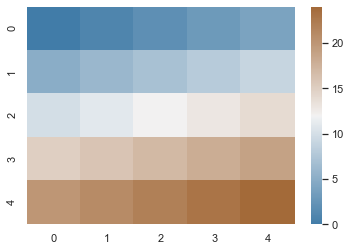

In [165]:
# Set a custom diverging colormap
# Referencing BNIA-JFI colors
# Hue anchors as its general blue (try a royal 240) and its Demographics/Population orange 39
cmap = sns.diverging_palette(240, 39, as_cmap=True)

# See what this range of colors aka color map looks like, using arange from numpy
x = np.arange(25).reshape(5, 5)
ax = sns.heatmap(x, cmap=cmap)

ValueError: zero-size array to reduction operation fmin which has no identity

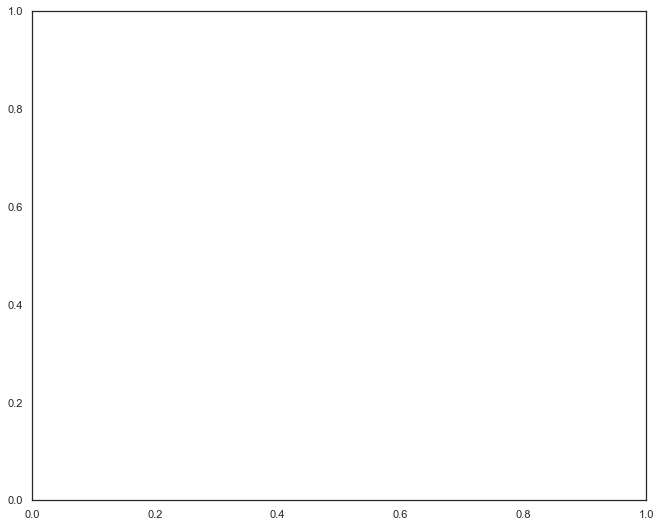

In [166]:
# Eureka! 
# We may still be able to go back and fine tune a few more duplicating columns that remain 
# (which we handled outside Python after exporting the first go around, but we can do better than that!)

# Awesome, now let's try a correlation matrix right here in Python
# Try the white theme from Seaborn package
sns.set_theme(style="white")

# Compute the correlation matrix
corr = IndicatorswAVGNoNaN.corr()

# For a diagonal matrix (only the lower triangle will appear 
# i.e. left to bottom half of the square cut off diagonally top left to bottom right) 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the figure
f, ax = plt.subplots(figsize=(11,9))

# Draw the correlation matrix which is a heatmap graph type
# Commented out below which is returning 'ValueError: zero-size array to reduction operation fmin which has no identity'
# Seems it may have to do with the diagonal and/or empty values, 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidth=.5, cbar=True, cbar_kws={"shrink": .5})

# consider adding a vmax=.3, ?

# so we'll try this without the diagonal sliced off
# but it didn't seem to make a difference with error
#sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})
